<a href="https://colab.research.google.com/github/arezkibersienne/Deep_Learning/blob/main/Numpy_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X Demension :  (100, 2)
Y Demension :  (100, 1)


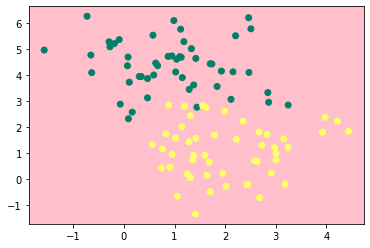

In [132]:
X , y = make_blobs(n_samples = 100 , n_features= 2 , centers = 2, random_state= 0)
y = y.reshape((y.shape[0], 1))

print("X Demension : " , X.shape)
print("Y Demension : " , y.shape)

plt.scatter(X[:,0], X[:,1], c=y , cmap="summer")
plt.show()

In [133]:
def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [134]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [135]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [136]:
def gradient(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A -y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [137]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W , b)

In [138]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [139]:
def artifical_neuron(X , y, learning_rate = 0.1, n_iter = 100):
  #init the W , b params
    W, b = init(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
     
    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    
    plt.plot(Loss)
    plt.show()

    return (W, b)

[[0.95069355]
 [0.80709505]
 [0.00743631]
 [0.18573682]
 [0.95501512]
 [0.36711677]
 [0.0780636 ]
 [0.92746317]
 [0.05746269]
 [0.88790332]
 [0.03695977]
 [0.88399675]
 [0.02718063]
 [0.02335667]
 [0.72943487]
 [0.97394673]
 [0.98929846]
 [0.04590923]
 [0.7825161 ]
 [0.67999731]
 [0.04853284]
 [0.04261822]
 [0.4211921 ]
 [0.00712199]
 [0.94754794]
 [0.03617007]
 [0.90734377]
 [0.00923788]
 [0.06765467]
 [0.73315902]
 [0.97724065]
 [0.04808683]
 [0.71866063]
 [0.97754128]
 [0.41709188]
 [0.21645377]
 [0.80408798]
 [0.54989012]
 [0.45807928]
 [0.5263803 ]
 [0.09420076]
 [0.06135774]
 [0.00127914]
 [0.17549123]
 [0.22901993]
 [0.83651781]
 [0.96765722]
 [0.96426495]
 [0.00707231]
 [0.01109184]
 [0.94167041]
 [0.62329367]
 [0.03756394]
 [0.04208033]
 [0.77919145]
 [0.04602659]
 [0.67645952]
 [0.8399313 ]
 [0.94118365]
 [0.9897867 ]
 [0.67782825]
 [0.17391243]
 [0.00664561]
 [0.9178883 ]
 [0.01521276]
 [0.3801204 ]
 [0.04736292]
 [0.57782722]
 [0.93025422]
 [0.26921394]
 [0.18925037]
 [0.92

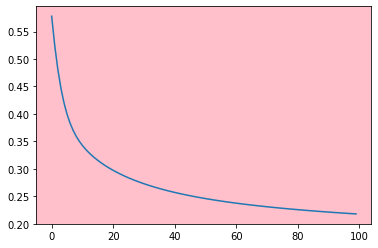

(array([[ 1.05071289],
        [-1.09939373]]), array([0.98295706]))

In [140]:
artifical_neuron(X,y)


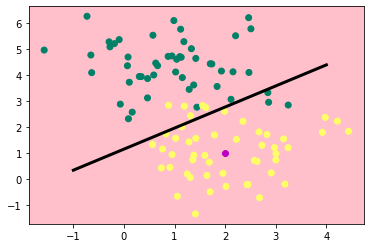

[0.88209857]


array([ True])

In [141]:
#changing the graph facecolor
plt.rcParams['axes.facecolor']='pink'

#Drawing the speration lane 
x0 = np.linspace(-1 , 4, 100)
x1 = (-W[0] * x0 - b) / W[1]


#Adding a new plant 
new_plant = np.array([2, 1])
plt.scatter(X[:,0], X[:,1], c=y , cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c="m")
plt.plot(x0 , x1 , c="black", lw="3")
plt.show()
predict(new_plant, W, b)